
## Course: CSCE 5215 Machine Learning
## Professor: Zeenat Tariq
## Activity 10



# Task 1

Implementation of KmeansClustering from scratch.

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity measures between data points.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Import necessary libraries

In [1]:
from sklearn.datasets import load_iris, load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from IPython.display import Image
import numpy as np

In [2]:

class KmeansClustering:

  def __init__(self,k=3):
    self.k=k
    self.centroids=None
  @staticmethod
  def euclidean_distance(data_point,centroids):
    return np.sqrt(np.sum((centroids-data_point)**2,axis=1)) # Centriods can be > 1

  def fit(self,X,max_iterations=200):
    self.centroids=np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),size=(self.k,X.shape[1])) #Intelligently keeping centroids in range of min and max of each feature

    for _ in range(max_iterations):
      y=[]
      for data_point in X:
        distances=KmeansClustering.euclidean_distance(data_point,self.centroids) # Caluculate the distances between the datapoint & centroids
        cluster_number=np.argmin(distances) # Assigning index of minimum distance index as cluster number
        y.append(cluster_number)

      y=np.array(y) # convert y to numpy array

      cluster_indicies=[]

      for i in range(self.k):
        cluster_indicies.append(np.argwhere(y==i))

      new_centroids=[]

      for i, indicies in enumerate(cluster_indicies):
        if len(indicies) == 0:
          new_centroids.append(self.centroids[i])
        else:
          new_centroids.append(np.mean(X[indicies],axis=0)[0])

      if np.max(self.centroids-np.array(new_centroids))<0.0001:
        break
      else:
        self.centroids= np.array(new_centroids)

    return y




In [3]:
# Load the iris  dataset
iris = load_iris()

In [4]:
# Split the dataset into features (X) and target variable (y)
X = iris.data
y = iris.target
df_iris=pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Target']=iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Initialize the class object and make predictions
clss=KmeansClustering()
clusters=clss.fit(X)


Visualize the clusters using matplotlib

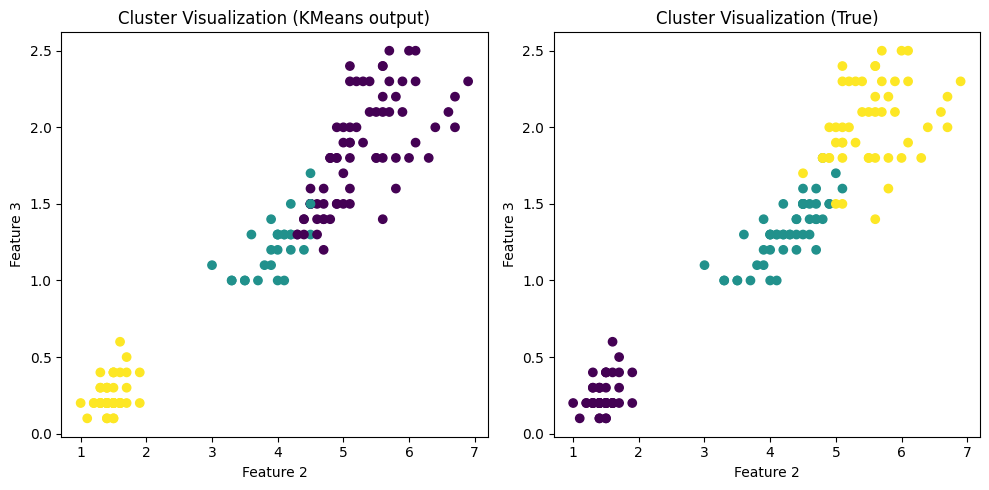

In [6]:

def vis(clusters, y):
  # Assuming you have obtained cluster assignments in `clusters` and true labels in `y`
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  # Plot the clusters using predicted labels
  axes[0].scatter(X[:, 2], X[:, 3], c=clusters, cmap='viridis')
  axes[0].set_xlabel('Feature 2')
  axes[0].set_ylabel('Feature 3')
  axes[0].set_title('Cluster Visualization (KMeans output)')

  # Plot the clusters using true labels
  axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap='viridis')
  axes[1].set_xlabel('Feature 2')
  axes[1].set_ylabel('Feature 3')
  axes[1].set_title('Cluster Visualization (True)')

  plt.tight_layout()
  plt.show()


vis(clusters, y)

K-means clustering from sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


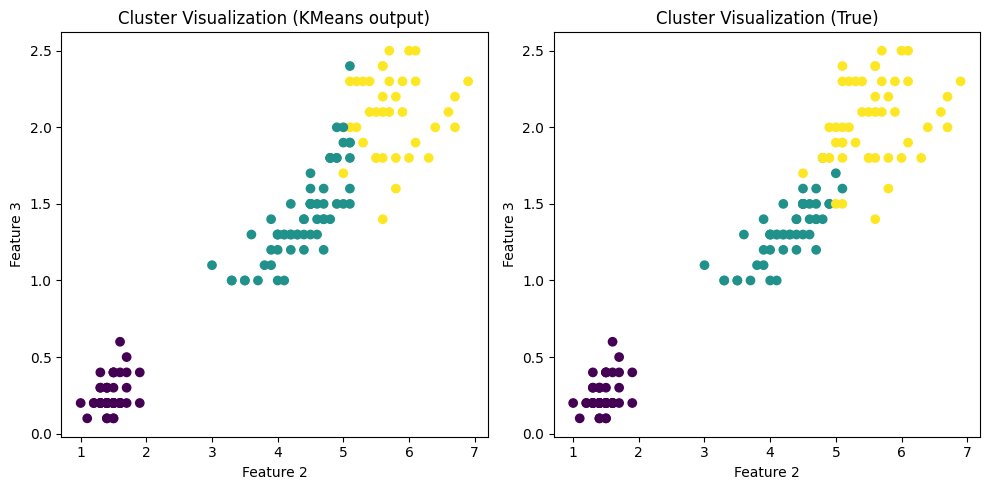

In [7]:
kmenas = KMeans(n_clusters=3)
kmenas.fit(X)
clusters_1 = kmenas.predict(X)
vis(clusters_1, y)

How to evaluate clustering algorithems

### Silhouette Coefficient

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).  Its value ranges from -1 to 1.

1: Means clusters are well apart from each other.

0: Means the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#:~:text=The%20Silhouette%20Coefficient%20is%20calculated,is%20not%20a%20part%20of.

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [8]:
Image(url="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Kq52h5BzHqPHQSwOAsLdfw.jpeg")

In [9]:
Image(url="https://miro.medium.com/v2/resize:fit:820/format:webp/1*B3O-5eop3UnKhJ249O3TGA.jpeg")

In [10]:
Image(url="https://miro.medium.com/v2/resize:fit:852/format:webp/1*S7_EIPmd4V5YlYbO5ksVGA.jpeg")

In [11]:
Image(url="https://miro.medium.com/v2/resize:fit:686/format:webp/1*X0YH8nNM6FOvHf0vAzc3Wg.png")

In [12]:
Image(url="https://miro.medium.com/v2/resize:fit:1114/format:webp/1*L581BuK5XgE1_gDP7eLFKQ.jpeg")

### Overall Silhouette score for the complete dataset can be calculated as the mean of silhouette score for all data points in the dataset. :

In [13]:
silhouette_score(X, clusters_1)

0.5528190123564095

### Adjusted Rand Index (ARI)

Measure of the similarity between two data clusterings (to check if clusters align with the labels)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [14]:
adjusted_rand_score(clusters_1, y)

0.7302382722834697

This can happen when the clustering aligns with ground truth (high ARI) but the quality of the clusters in terms of compactness and separation (Silhouette Coefficient) is not optimal

### Silhouette Coefficient can help to quality the clustering based on the data alone (no ground truth).

### ARI can help to determine how well your clustering aligns with that ground truth

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

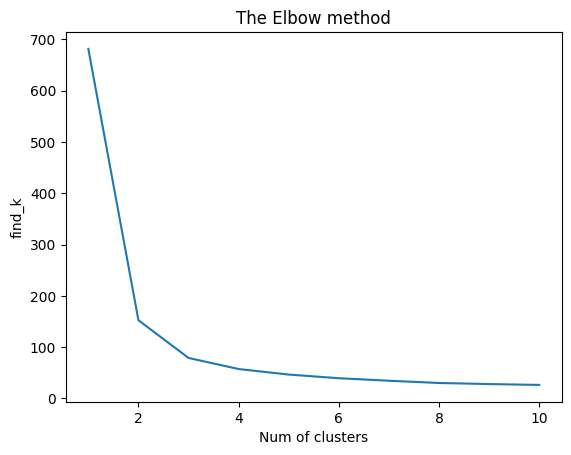

In [15]:
find_k =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i)
    km.fit(X)
    find_k.append(km.inertia_) #Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

plt.plot(range(1,11),find_k)
plt.title('The Elbow method')
plt.xlabel('Num of clusters')
plt.ylabel('find_k')
plt.show()

### Practice

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import GridSearchCV

# Load the data
# Dataset = https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data
file_path = '/content/drive/MyDrive/ColabNotebooks/Credit Card Customer Data.csv'
data = pd.read_csv(file_path)


X = data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

null_values = data.isnull().sum()

print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64




* Imported all the required libraries.
* Take a Credit Card Customer Dataset from Kaggle
* Check if the dataset has any null values.



In [18]:
# Apply KMeans. Use GridSearch and perform hyper-parameter optimisation
true_labels = data['Avg_Credit_Limit']

params = {'n_clusters': [3, 4, 5, 6]}
silhouette_scores = []
rand_indices = []

for k in params['n_clusters']:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    rand_index = adjusted_rand_score(true_labels, kmeans.labels_)
    rand_indices.append(rand_index)

best_k = params['n_clusters'][silhouette_scores.index(max(silhouette_scores))]

kmeans = KMeans(n_clusters=best_k, random_state=123, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=123)

* Using the different numbers of clusters to find the best number of clusters using silhouette score.
* As we can see the best results are obtained when there are 3 clusters formed.

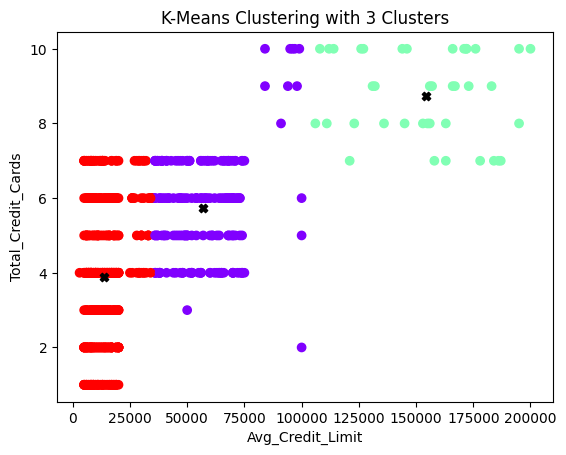

In [19]:
# Plot the clusters result
feature_1 = 'Avg_Credit_Limit'
feature_2 = 'Total_Credit_Cards'

plt.scatter(X[feature_1], X[feature_2], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, X.columns.get_loc(feature_1)], kmeans.cluster_centers_[:, X.columns.get_loc(feature_2)], c='black', marker='X')
plt.title(f'K-Means Clustering with {best_k} Clusters')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()

* The above is the Scatter plot with 3 clusters and their mid points taking 2 features as x and y-axis.

In [20]:
# Evaluate your clusters using Silhouette Coefficient and Rand Index
silhouette_avg = silhouette_scores[params['n_clusters'].index(best_k)]
print(f"Silhouette Score: {silhouette_avg}")

rand_index = rand_indices[params['n_clusters'].index(best_k)]
print(f"Rand Index: {rand_index}")

Silhouette Score: 0.7187172255928896
Rand Index: 0.04556602590554292


* Printing the Sihouette Score and Rand Index for the above model with 3 clusters.

Write your understanding of Kmeans, Silhouette Coefficient, and Rand Index in 200 words.

K-Means is an unsupervised clustering algorithm. That means it is used in unlabeled data. The k-Means clustering algorithm mainly helps divide the data points into diffrent clusters of 2,3 or n. The k-Mean clustering algorithm groups the datasets based on the mean of distance. K-Means clustering is mainly used when there is a large amount of data.

The Silhouette Coefficient tells how well the data points are clustered/grouped. It tells how similar the objects in its groups. If the Silhouette Coefficient is high then that means the data points are nicely separated and the data points in that particular are almost similar to each other. Where are when the Silhouette Coefficient is low, that means the data is not well separated.

Rand index also helps in knowing the quality of clusters formed. For the rand index, we need labels whereas for silhouette coefficients we do not need any labels. Adjusted in reand_index is adding an expected random index. It makes more robust the rand index.

For the above practice, we can see the Silhouette Coefficient is 0.71 which is near 1 and high, which means the data points in a particular cluster are more similar to each other and the clusters are nicely formed with 3 clusters as seen in the scatter plot.